# Математическая статистика
## Практическое задание 3

В данном задании рассматриваются свойства условного математического ожидания. В частности, рассматривается модель смеси гауссовских распределений.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 3"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 1 балл
* Задача 3 - 2 балла
* Задача 4 - 7 баллов
* Задача 5<font size="5" color="red">\*</font> - 10 баллов

**Задача 1.** На вероятностном пространстве $\left(\mathbb{R}_+, \mathcal{B}(\mathbb{R}_+), \mathsf{P}\right)$, где $\mathsf{P}$ --- экспоненциальное распределение с параметром $\lambda$, задана случайная величина $\xi$ по правилу $\xi(\omega) = \omega$. Cигма-алгебра $\mathcal{G}$ порождена счетной системой событий $\{B_n\}_{n\geq1},$ где $B_n = \{n-1\leq \omega<n\}.$. Для $\omega \in [0, 5]$ постройте графики 
* плотности распределения $\mathsf{P}$ для $\lambda \in \{1, 3, 10\}$
* $\xi$ и $\mathsf{E}(\xi | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$
* $\xi^2$ и $\mathsf{E}(\xi^2 | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$

Используйте приведенный ниже шаблон. Одному и тому же значению $\lambda$ во всех графиках должен соответствовать один и тот же цвет.

Плотность экспоненциального распределения $p(x) = \lambda e^{-\lambda x}$.

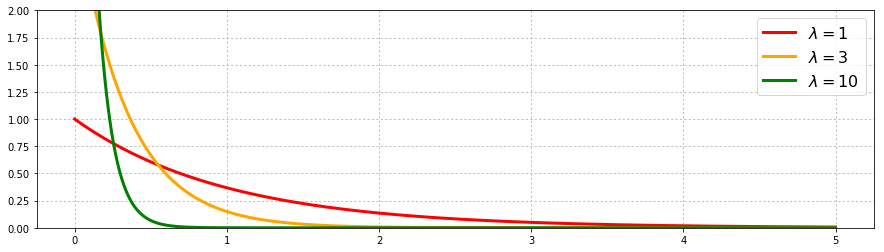

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps

%matplotlib inline

# График 1
lambda_ = [1, 3, 10]
plt.figure(figsize=(15, 4))
grid = np.linspace(0, 5, 500)
color_ = ["red", "orange", "green"]
count = 0
for l in lambda_:
    p_x = l * (np.exp(-l * grid))
    plt.plot(grid, p_x, lw=3, color=color_[count], label='$\\lambda={}$'.format(l))
    count+=1
plt.legend(fontsize=16)
plt.ylim((0, 2))
plt.grid(ls=':')

$\mathsf{E}(\xi | \mathcal{G}) = \sum_{n\in \mathbb{N}} \frac{\mathsf{E}(\xi \mathsf{I}_{B_{n}})}{P(\xi \in B_{n})}\mathsf{I}_{B_{n}}$

$\mathsf{E}(\xi \mathsf{I}_{B_{n}}) = \int\limits_{-\infty}^{+\infty} xp(x)I_{B_{n}}dx = \int\limits_{n-1}^{n} x\lambda e^{-\lambda x}dx = \frac{1}{\lambda}e^{-\lambda n}(e^{\lambda}(\lambda (n-1)+1)-\lambda n-1)$

$P(\xi \in B_{n}) = F(n) - F(n-1) = (1-e^{-\lambda n}) - (1-e^{-\lambda (n-1)}) = e^{-\lambda n}(e^{\lambda}-1)$

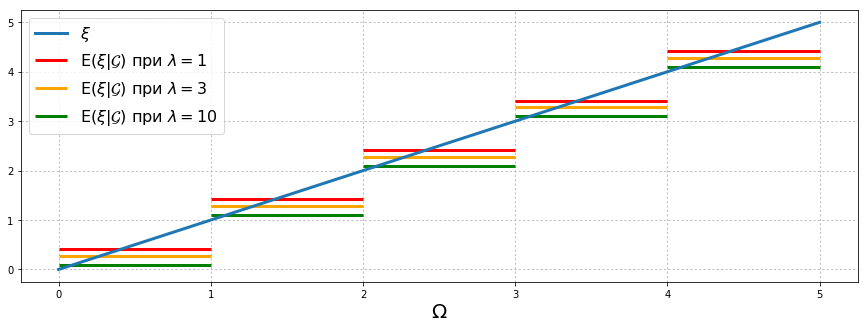

In [13]:
# График 2
plt.figure(figsize=(15, 5))
n = 5
grid = np.linspace(0, 5, n + 1)
l = 1
plt.plot(grid, grid, lw=3, label='$\\xi$')
for i in np.arange(1, 6, 1):  # события из сигма-алгебры
    count = 0
    for l in lambda_:
        M_e = 1 /l * np.exp(-l*i) * (np.exp(l) * (l*(i-1) + 1) - l*i - 1)
        P_e = (np.exp(-l*i) * (np.exp(l)-1))
        plt.hlines(y = M_e / P_e, xmin=i-1, xmax=i, color=color_[count], lw=3,
                       label=('$\\mathsf{E}(\\xi|\\mathcal{G})$ при $\\lambda = ' + str(l) 
                              + '$') if i == 1 else '')
        count += 1
plt.xlabel('$\\Omega$', fontsize=20)
plt.legend(fontsize=16)
plt.grid(ls=':')

$\mathsf{E}(\xi^2 | \mathcal{G}) = \sum_{n\in \mathbb{N}} \frac{\mathsf{E}(\xi^2 \mathsf{I}_{B_{n}})}{P(\xi^2 \in B_{n})}\mathsf{I}_{B_{n}}$

$\mathsf{E}(\xi^2 \mathsf{I}_{B_{n}}) = \int\limits_{-\infty}^{+\infty} x^2p(x)I_{B_{n}}dx = \int\limits_{n-1}^{n} x^2\lambda e^{-\lambda x}dx = \frac{1}{\lambda^2}e^{-\lambda n}(-n\lambda(n\lambda + 2)+e^{\lambda}(\lambda (n-1)(\lambda(n-1)+2)+2)-2)$

$P(\xi^2 \in B_{n}) = F(n) - F(n-1) = (1-e^{-\lambda n}) - (1-e^{-\lambda (n-1)}) = e^{-\lambda n}(e^{\lambda}-1)$

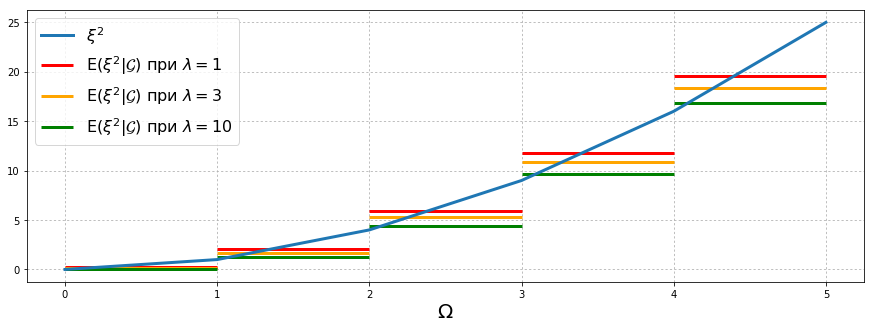

In [73]:
# График 3 для \xi^2 аналогичен графику 2
plt.figure(figsize=(15, 5))
n = 5
grid = np.linspace(0, 5, n + 1)
l = 1
plt.plot(grid, grid ** 2, lw=3, label='$\\xi^2$')
for i in np.arange(1, 6, 1):  # события из сигма-алгебры
    count = 0
    for l in lambda_:
        M_e = 1 /(l**2) * np.exp(-l*i) * (-i*l*(i*l + 2) + 
                                          np.exp(l)*((i-1)*l*((i - 1)*l + 2) + 2) -2)
        P_e = (np.exp(-l*i) * (np.exp(l)-1))
        plt.hlines(y = M_e / P_e, xmin=i-1, xmax=i, color=color_[count], lw=3,
                       label=('$\\mathsf{E}(\\xi^2|\\mathcal{G})$ при $\\lambda = ' 
                              + str(l) + '$') if i == 1 else '')
        count += 1
plt.xlabel('$\\Omega$', fontsize=20)
plt.legend(fontsize=16)
plt.grid(ls=':')

**Вывод:**
Построив необходимые графики, мы убедились, что условное математическое ожидание является усреднением значений слчайной величины относительно условного распределения.

**Задача 2.** 
Пусть $\xi = (\xi_1, \xi_2) \sim \mathcal{N}(a, \Sigma)$, где $a=0$ и $\Sigma = \begin{pmatrix}10 & 8 \\ 8 & 10\end{pmatrix}$. Для $y \in \{-3, 0, 1, 5\}$ постройте графики условной плотности $f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right)$.

Запишем формулу совместной плотности двух нормально распределенных случайных величин(учитывая, что вектор мат. ожидания равен (0, 0))

$p_{(\xi_{1},\xi_{2})}(x, y) = \frac{1}{2 \pi \sigma_{1}} \sigma_{2} \sqrt{1-p^2}exp\Bigr(-\frac{1}{2(1-p^2}(\frac{x^2}{\sigma^2}-p\frac{2xy}{\sigma_{1} \sigma_{2}}+\frac{y^2}{\sigma_{2}^2})\Bigl)$, где p= $\frac{\Sigma[0][1]}{\sigma_{1} \sigma_{2}}$ коэффициент корреляции случайных величин $\xi_{1}$ и $\xi_{2}$

Подставляя данные нам значения, получим совместную плотность

$p_{(\xi_{1},\xi_{2})}(x, y) = \frac{1}{12\pi}exp\Bigr(-\frac{1}{36}(5x^2-8xy+5y^2)\Bigl)$

Плотность случайной величины $\xi_{2}$(следует из плотности нормального распределения)

$p_{\xi_{2}}(y) = \frac{1}{\sqrt{20\pi}}e^{-\frac{1}{20}y^2}$

Так как существует совместная плотность, то существует и условная плотность, которая вычисляется по формуле

$p_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right) = \frac{p_{(\xi_{1},\xi_{2})}(x, y)}{p_{\xi_{2}}(y)}=\frac{1}{6} \sqrt{\frac{5}{\pi}}exp\Bigr(-\frac{1}{36}(5x^2-8y)-\frac{4}{45}y^2\Bigl)$


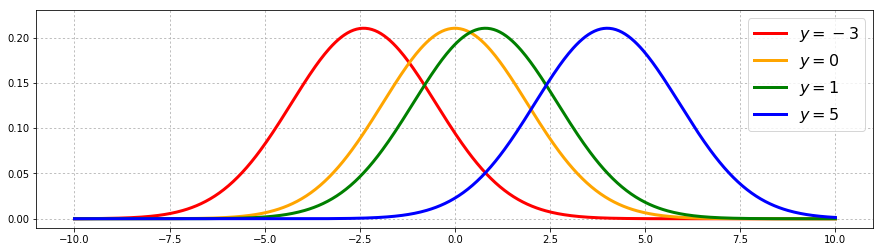

In [75]:
y_ = [-3, 0, 1, 5]
plt.figure(figsize=(15, 4))
grid = np.linspace(-10, 10, 500)
color_ = ["red", "orange", "green", "blue"]
count = 0
for y in y_:
    p_x_y = 1/6 * np.sqrt(5/np.pi) * np.exp(-1/36 * (5 * grid**2 - 8*grid*y) - 
                                            4*(y**2)/45)
    plt.plot(grid, p_x_y, lw=3, color=color_[count], label='$y={}$'.format(y))
    count+=1
plt.legend(fontsize=16)
plt.ylim((-0.01, 0.23))
plt.grid(ls=':')

**Вывод:**
Графики условных плотностей при фиксированных y схожи с графиком нормального распределения. Причём, с увеличением y увеличивается значение условной плотности.

**Задача 3.**
Имеется множество серверов, которые периодически выходят из строя. 
Обозначим $\xi_i$ время между $i$-м моментом выхода из строя сервера и $(i+1)$-м.
Известно, что величины $\xi_i$ независимы в совокупности и имеют экспоненциальное распределение с параметром $\lambda$.

Обозначим $N_t$ --- количество серверов, которые вышли из строя к моменту времени $t$ (в начальный момент времени $N_0 = 0$).
В курсе случайных процессов будет доказано, что для любых $s < t$ величина $N_t - N_s \sim Pois(\lambda (t - s))$ и независима с $N_s$.
При этом $N_t$ как функция от $t$ будет называться пуассоновским процессом интенсивности $\lambda$.

Вам нужно знать, сколько серверов нужно докупить к моменту времени $t$ взамен вышедших из строя.
В момент времени $s$ предсказанием количества серверов, вышедших из строя к моменту времени $t$, будем считать величину $\mathsf{E}( N_t | N_s)$.

Сгенерируйте выборку случайных величин $\xi_i$ для $\lambda = 1/4$ в количестве, чтобы их сумма была больше 100.
Для $t=100$ постройте графики зависимости величины $\mathsf{E}( N_t | N_s)$ от $s$ в предополжении, что условное математическое ожидание было посчитано при значении $\lambda \in \{1/10, 1/4, 1/2, 1\}$. Нарисуйте также на графике горизонтальную прямую уровня $N_{100}$.

Найдем условное мат. ожидание $\mathsf{E}( N_t | N_s)$.

$\mathsf{E}( N_t | N_s) = \mathsf{E}(N_t-N_s+N_s|N_s) = \mathsf{E}(N_t-N_s|N_s) + \mathsf{E}(N_s|N_s)$

Учитывая, что $N_t-N_s$ независима с $N_s$, получаем, что $\mathsf{E}(N_t-N_S|N_s)=\mathsf{E}(N_t-N_s)=\lambda(t-s)$, 
$\mathsf{E}(N_s|N_s) = N_s$

Следовательно, $\mathsf{E}(N_t|N_s) = \lambda(t-s) + N_s$

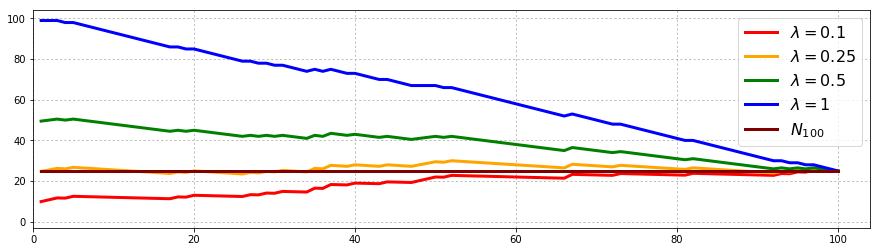

In [78]:
n=600
sample = sps.poisson.rvs(mu=1/4, loc=0, size=n)
N_s = np.cumsum(sample)
s = np.linspace(1, 100, 100)
plt.figure(figsize=(15, 4))
lambda_ = [1/10, 1/4, 1/2, 1]
color_ = ["red", "orange", "green", "blue"]
count = 0
for l in lambda_:
    plt.plot(s, N_s[:100] + l * (100 - s), lw=3, color=color_[count], 
             label='$\\lambda={}$'.format(l))
    count+=1
line_N_100 = np.ones(100)
plt.plot(s, line_N_100 * N_s[100], lw=3, color="maroon", label='$N_{100}$')
plt.legend(fontsize=16)
plt.ylim((-3, 104))
plt.xlim((0, 104))
plt.grid(ls=':')

**Вывод:**
Построив график, мы увидели, как меняются значения условного мат. ожидания в зачисимости от $\lambda$. По графику видим, что значения полученные при $\lambda=\frac{1}{4}$ очень близки к истинному значению($N_{100}$). Чем больше $|\lambda-\frac{1}{4}|$, тем больше отклонение полученных значений от истинного.

**Задача 4.** 
Рассмотрим модель смеси многомерных гауссовских распределений, то есть распределение, имеющее плотность $p(x) = \sum\limits_{k=1}^K p_k(x) \mathsf{P}(T = k),$ где $T$ --- случайная величина, принимающая значения $\{1, ..., K\}$ и имеющая смысл номера компоненты смеси, а $p_k(x)$ --- плотность распределения $N(a_k, \Sigma_k)$.


Загрузите датасет "Ирисы Фишера", используя следующий код.

In [4]:
from sklearn.datasets import load_iris
data = load_iris()
data['data']  # выборка
data['target']  # номера компонент смеси

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

В предположении, что каждый класс имеет гауссовское распределение, оцените его параметры. Используйте для этого функции `numpy.mean` и `numpy.cov`. Проверьте, что матрица ковариаций получилась правильной --- возможно, придется предварительно поменять порядок осей (транспонировать). Напечатайте полученные оценки.

In [17]:
iris_buckets = [[], [], []]

for i in range(len(data['data'])):
    iris_buckets[data['target'][i]].append(data['data'][i])

iris_buckets = np.array(iris_buckets)
    
def estimate_gaussian(sample):
    sample = np.array(sample)
    return (np.mean(sample, axis=0), np.cov(sample.T))

means = []
covs = []

for i in range(len(iris_buckets)):
    ret = estimate_gaussian(iris_buckets[i])
    means.append(ret[0])
    covs.append(ret[1])
    print("Компонента №" + str(i) + ":")
    print(u"    Матожидание: " + str(means[i]))
    print(u"    Матрица ковариаций:")
    print(covs[i])
    

Компонента №0:
    Матожидание: [ 5.006  3.418  1.464  0.244]
    Матрица ковариаций:
[[ 0.12424898  0.10029796  0.01613878  0.01054694]
 [ 0.10029796  0.14517959  0.01168163  0.01143673]
 [ 0.01613878  0.01168163  0.03010612  0.00569796]
 [ 0.01054694  0.01143673  0.00569796  0.01149388]]
Компонента №1:
    Матожидание: [ 5.936  2.77   4.26   1.326]
    Матрица ковариаций:
[[ 0.26643265  0.08518367  0.18289796  0.05577959]
 [ 0.08518367  0.09846939  0.08265306  0.04120408]
 [ 0.18289796  0.08265306  0.22081633  0.07310204]
 [ 0.05577959  0.04120408  0.07310204  0.03910612]]
Компонента №2:
    Матожидание: [ 6.588  2.974  5.552  2.026]
    Матрица ковариаций:
[[ 0.40434286  0.09376327  0.3032898   0.04909388]
 [ 0.09376327  0.10400408  0.07137959  0.04762857]
 [ 0.3032898   0.07137959  0.30458776  0.04882449]
 [ 0.04909388  0.04762857  0.04882449  0.07543265]]


Нарисуйте график плотности (тепловую карту) в проекции на первые две координаты и нанесите на график точки выборки. При выполнении задания полезно вспомнить решение части 3 задачи 1 задания 1. Используйте шаблон ниже.

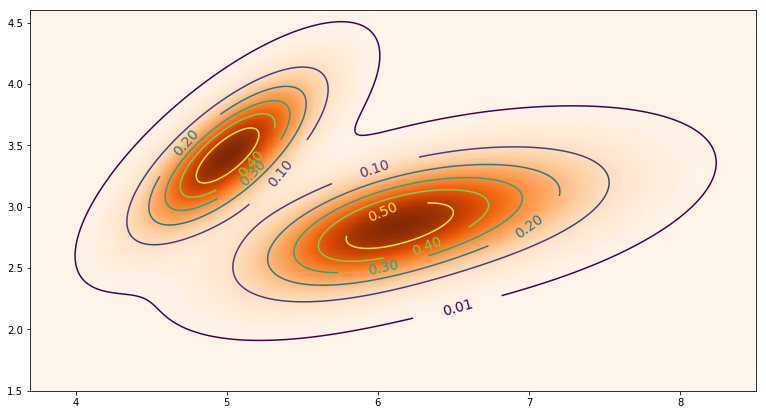

In [71]:
def make4to2(mean, cov):
    return (np.array([mean[0], mean[1]]), 
            np.array([[cov[0][0], cov[0][1]], 
                      [cov[1][0], cov[1][1]]]));

I = np.array([0, 1])  # это можно передавать в качестве индексов
grid = np.mgrid[3.6:8.5:1e-2, 1.5:4.7:1e-2]
pos = np.empty(grid[0].shape + (2,))
pos[:, :, 0] = grid[0]
pos[:, :, 1] = grid[1]
gauss0 = sps.multivariate_normal(*make4to2(means[0], covs[0]))
gauss1 = sps.multivariate_normal(*make4to2(means[1], covs[1]))
gauss2 = sps.multivariate_normal(*make4to2(means[2], covs[2]))
density = 1/3 * (gauss0.pdf(pos) + gauss1.pdf(pos) + gauss2.pdf(pos))
plt.figure(figsize=(13, 7))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.xlim(3.7, 8.5)
plt.ylim(1.5, 4.6)
plt.show()

Вычислите условное математическое ожидание $\mathsf{E}( X | I\{T \not= k\} = 1)$ для всех $k = 1,2,3$, где $X$ --- случайный вектор, имеющий распределение смеси.
Постройте графики условной плотности $p_{X|I\{T \not= k\}}\left(x \left| 1\right.\right)$ в проекции на первые две координаты. Подберите хорошие значения линий уровня.

**Решение:**

Посчитаем мат. ожидание для k=1, для остальных k будет симметрично. Индикатор $I_{T\neq 1}$ порождает $\sigma$-алгебру $\{0, \Sigma, T\neq1, \overline{T\neq1}\}$, т.е. $\sigma$-алгебру, порожденную разбиением. Тогда воспользуемся формулой:

$\mathsf{E}( X | I_{T \neq 1})=\sum_{n\in \mathbb{N}} \frac{\mathsf{E}(X \mathsf{I}_{T_{n}})}{P(X \in T_{n})}\mathsf{I}_{T_{n}} = \frac{\mathsf{E}(XI_{T=1})}{P(T=1}I_{T=1} + \frac{\mathsf{E}(XI_{T\neq1})}{P(T\neq1}I_{T\neq1}=3\mathsf{E}(XI_{T=1})(1-I_{T\neq1})+\frac{3}{2}(\mathsf{E}(XI_{T=1})+\mathsf{E}(XI_{T=1}))I_{T\neq1}=a_{1}(1-I_{T\neq1}) + \frac{1}{2}(a_{2}+a_{3})I_{T\neq1}$

Следовательно, $\mathsf{E}( X | I_{T \neq 1}=1)=\frac{1}{2}(a_{2}+a_{3})$

Отсюда получаем, что $p_{X|I_{T\neq k}}(x|y)=p_{k}(x)(1-y) + \frac{1}{2}(p_{i}(x)+p_{j}(x))y$, где $\{i, j, k\}=\{1, 2, 3\}$

Тогда $p_{X|I_{T\neq k}}(x|1)=\frac{1}{2}(p_{i}(x)+p_{j}(x))$

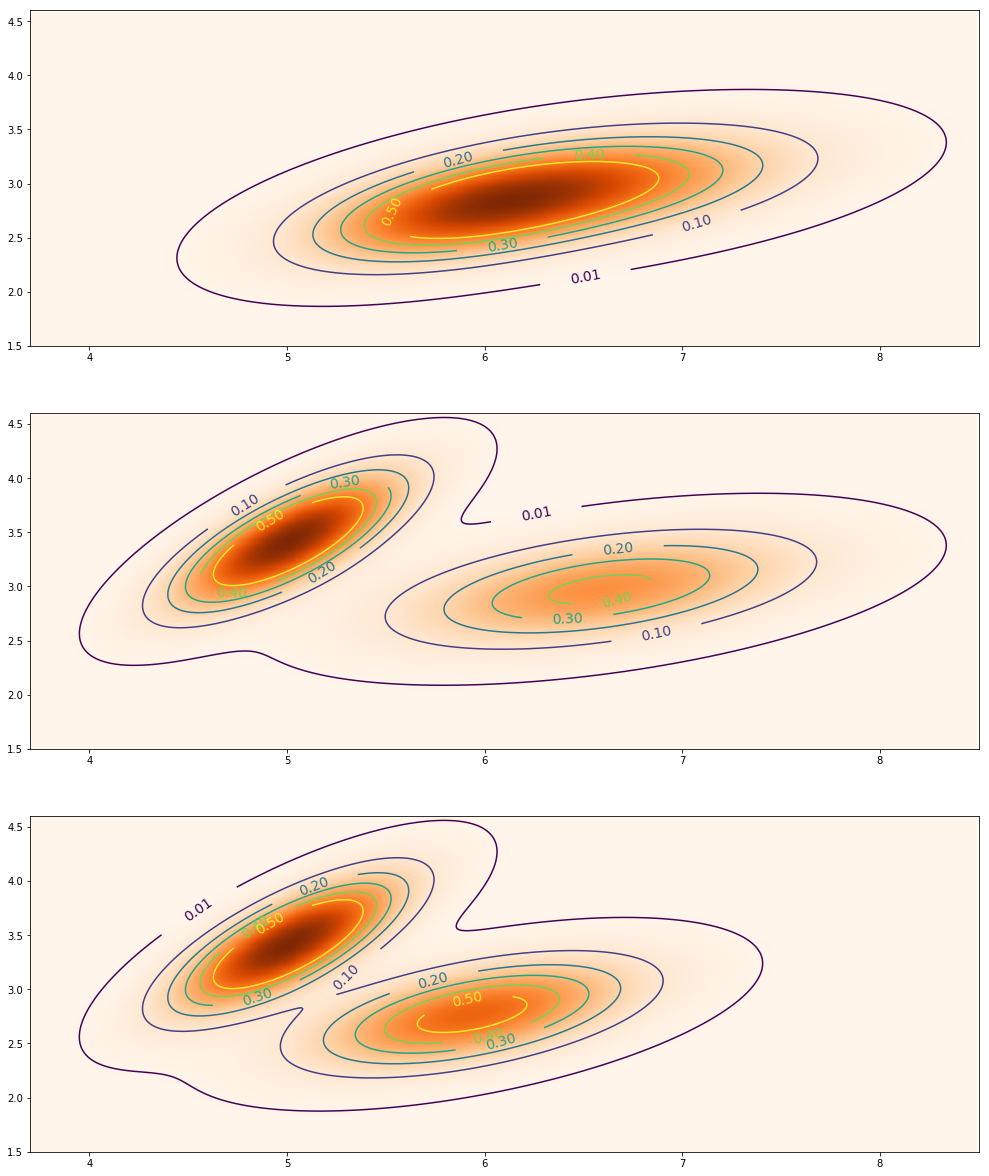

In [72]:
grid = np.mgrid[3.6:8.5:1e-2, 1.5:4.7:1e-2]
pos = np.empty(grid[0].shape + (2,))
pos[:, :, 0] = grid[0]
pos[:, :, 1] = grid[1]
density0 = 1/2 * (gauss1.pdf(pos) + gauss2.pdf(pos))
density1 = 1/2 * (gauss0.pdf(pos) + gauss2.pdf(pos))
density2 = 1/2 * (gauss0.pdf(pos) + gauss1.pdf(pos))
plt.figure(figsize=(17, 21))
for i, density in enumerate([density0, density1, density2]):
    plt.subplot(3, 1, i + 1)
    plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
    plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
    CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.2, 0.3, 0.4, 0.5])
    plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
    plt.xlim(3.7, 8.5)
    plt.ylim(1.5, 4.6)
plt.show()

Классифицируйте все пространство по принципу $k = \text{arg}\max\limits_k p_{X|I\{T = k\}}\left(x \left| 1\right.\right)$.
Посчитайте долю ошибок на выборке.
Нарисуйте классификацию всего пространства в проекции на пары координат (0, 1), (1, 3) и (2, 3), где закрасьте разными цветами области, которые образовались в результате классификации.

In [ ]:
...

**Вывод:**
Построив графики функций, мы убедились, что плотность "Ирисов Фишера" может быть приближена с помощью гауссовских векторов.

**Задача 5<font size="5" color="red">\*</font>.** В предыдущей задача информация о принадлежности наблюдения конкретной компоненте смеси была известна заранее. Как выть в случае, если такой информации нет? Задача оценки параметров распределения смеси может быть решена с помощью иттерационного EM-алгоритма.

Опишите, как работает EM-алгоритм (это обязательное условие, при котором эта задача будет проверяться). Затем примените EM-алгоритм к Ирисам Фишера и к некоторым искусственно сгенерированным датасетам. Исследуйте, как результат зависит от параметров алгоритма. Сделайте вывод.

*Разобраться в EM-алгоритме помогут:*

https://basegroup.ru/community/articles/em

http://www.machinelearning.ru/wiki/index.php?title=%D0%95%D0%9C-%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC

https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm

Bishop, C.M. Pattern Recognition and Machine Learning, глава 9.

*Реализация EM-алгоритма для смеси гауссовских распределений:*

http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture